In [74]:
import functools
import requests
import re
from parsel import Selector
from IPython.display import display
from PIL import Image
import shutil

class TKUCourseSelector:
    captcha_pattern = re.compile('^\[("[0-9a-z]{64}",?){6}\]$')
    captcha_mapping = {
        '4ae81572f06e1b88fd5ced7a1a000945432e83e1551e6f721ee9c00b8cc33260': '0',
        'a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0e22207b8981233ec58': '1',
        'fcb5f40df9be6bae66c1d77a6c15968866a9e6cbd7314ca432b019d17392f6f4': '2',
        'e632b7095b0bf32c260fa4c539e9fd7b852d0de454e9be26f24d0d6f91d069d3': '3',
        '559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd': '4',
        'a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919271f9fa140b0508c6c': '5',
        '8de0b3c47f112c59745f717a626932264c422a7563954872e237b223af4ad643': '6',
        'a25513c7e0f6eaa80a3337ee18081b9e2ed09e00af8531c8f7bb2542764027e7': '7',
        '6b23c0d5f35d1b11f9b683f0b0a617355deb11277d91ae091d399c655b87940d': '8',
        '3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0ebfda1a01ec05745d43': '9'
    }
    def __init__(self):
        self.session = requests.Session()
        # Global timeout
        self.session.request = functools.partial(self.session.request, timeout=30)
        self.session.headers['User-Agent'] = (
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:73.0) Gecko/20100101 Firefox/73.0')
        self.last_page = None

    @staticmethod
    def get_captcha_code(text: str):
        print(text)
        assert __class__.captcha_pattern.match(text) is not None, "captcha not match!"
        return ''.join(map(__class__.captcha_mapping.get, eval(text)))

    @staticmethod
    def get_hidden_arg(html: str):
        sel = Selector(html)
        return {
            prop: sel.css(f'#{prop}::attr("value")').get()
            for prop in ('__VIEWSTATE', '__VIEWSTATEGENERATOR', '__EVENTVALIDATION')
        }
    
    def get_img(self):
        res = self.session.get('https://www.ais.tku.edu.tw/EleCos/BaseData/confirm.ashx?', stream=True)
        f = open('captcha.png', 'wb')
        shutil.copyfileobj(res.raw, f)
        f.close()
        
        img = Image.open('captcha.png')
        display(img)
        

    def login(self) -> requests.Response:
        login_page = self.session.get(
            'https://www.ais.tku.edu.tw/EleCos/login.aspx?ReturnUrl=%2felecos%2f')
        captcha_page = self.session.post(
            'https://www.ais.tku.edu.tw/EleCos/Handler1.ashx')

        post_data = self.get_hidden_arg(login_page.text)
        
        arr = eval(captcha_page.text)
        print(len(arr[0]))
        print(self.get_captcha_code(captcha_page.text))
        
        

## code
4ae81572f06e1b88fd5ced7a1a000945432e83e1551e6f721ee9c00b8cc33260 = 0
a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0e22207b8981233ec58 = 1
fcb5f40df9be6bae66c1d77a6c15968866a9e6cbd7314ca432b019d17392f6f4 = 2
e632b7095b0bf32c260fa4c539e9fd7b852d0de454e9be26f24d0d6f91d069d3 = 3
559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd = 4
a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919271f9fa140b0508c6c = 5
8de0b3c47f112c59745f717a626932264c422a7563954872e237b223af4ad643 = 6
a25513c7e0f6eaa80a3337ee18081b9e2ed09e00af8531c8f7bb2542764027e7 = 7
6b23c0d5f35d1b11f9b683f0b0a617355deb11277d91ae091d399c655b87940d = 8
3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0ebfda1a01ec05745d43 = 9



64
["a25513c7e0f6eaa80a3337ee18081b9e2ed09e00af8531c8f7bb2542764027e7","a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0e22207b8981233ec58","4ae81572f06e1b88fd5ced7a1a000945432e83e1551e6f721ee9c00b8cc33260","a25513c7e0f6eaa80a3337ee18081b9e2ed09e00af8531c8f7bb2542764027e7","fcb5f40df9be6bae66c1d77a6c15968866a9e6cbd7314ca432b019d17392f6f4","a25513c7e0f6eaa80a3337ee18081b9e2ed09e00af8531c8f7bb2542764027e7"]
710727


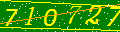

In [75]:

course_selector = TKUCourseSelector()
course_selector.login()
course_selector.get_img()
